In [ ]:
# 필요한 라이브러리 가져오기

import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd
from os import listdir
import cv2
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg
from keras.preprocessing import image

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# 파트 1에서 생성한 모델 불러오기 "mask_epoch30_v1.h5"

from tensorflow.python.keras.models import load_model
from google.colab import files
uploaded = files.upload()
list(uploaded.keys())[0]
model = load_model(list(uploaded.keys())[0])

Saving mask_epoch30_v1.h5 to mask_epoch30_v1 (3).h5


In [ ]:
# 신호등 색 선정

def light(list):
  what=""
  if list.index(max(list))==0:
    what="green"
  elif list.index(max(list))==1:
    what="red"
  elif list.index(max(list))==2:
    what="yellow"
  return what

#마스크 여부 판별 함수_주소 투입의 경우

def mask_ox(fn):
  path = fn         # type이 str이다 
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  classes_1 = classes.tolist()
  classes_2 = classes_1[0]
  light_color = light(classes_2)
  print(fn," is ",light_color)


#마스크 여부 판별 함수_이미지투입의 경우

def mask_ox_img(img):

  img=cv2.resize(img,(150,150)) 
  plt.imshow(face_img)
  plt.show()
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  classes_1 = classes.tolist()
  classes_2 = classes_1[0]
  light_color = light(classes_2)
  print(fn," is ",light_color)

In [ ]:
# 연습용 확인 코드

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  mask_ox(fn)

Saving 02046_Mask.jpg to 02046_Mask.jpg
Saving 02080_Mask.jpg to 02080_Mask.jpg
Saving 02118_Mask.jpg to 02118_Mask.jpg
02046_Mask.jpg  is  green
02080_Mask.jpg  is  green
02118_Mask.jpg  is  green


In [ ]:
# 사진에서 얼굴 감지하기 위해 openCV 불러오기

import cv2
from google.colab.patches import cv2_imshow
import glob
import matplotlib.pyplot as plt

# install pnslib
!pip install git+git://github.com/PnS2019/pnslib.git
!wget https://pns2019.github.io/images/Lenna.png
from pnslib import utils

from tensorflow.python.keras.models import load_model
from google.colab import files
import numpy as np
from keras.preprocessing import image

  Cloning git://github.com/PnS2019/pnslib.git to /tmp/pip-req-build-sz0za9r2
  Running command git clone -q git://github.com/PnS2019/pnslib.git /tmp/pip-req-build-sz0za9r2
  Created wheel for pnslib: filename=pnslib-0.1.0a1-cp36-none-any.whl size=1489619 sha256=ea647ec4149e327393e7c3699a1f8f85f6356d68380d37cad6c51583635abd05
  Stored in directory: /tmp/pip-ephem-wheel-cache-86o_p1d9/wheels/a2/8e/a9/c62e72840009deaa723b3a113d5c3b90acac77098d16e90eca
Successfully built pnslib
--2021-01-29 06:12:53--  https://pns2019.github.io/images/Lenna.png
Resolving pns2019.github.io (pns2019.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to pns2019.github.io (pns2019.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘Lenna.png.15’

Lenna.png.15        100%[===================>] 462.73K  --.-KB/s    in 0.008s  

2021-01-29 06:12:53 (53.5 MB/s) - ‘Lenna.png.15’ saved [473831/473831]


Saving mask.jpg to mask (3).jpg
Saving 5.jpg to 5 (5).jpg
Saving 00037_Mask_Chin.jpg to 00037_Mask_Chin.jpg
Saving 00038_Mask_Mouth_Chin.jpg to 00038_Mask_Mouth_Chin.jpg
1 번째 사진
green
There are total  1 people!
There are  0 red people!
There are  0 yellow people!
There are  1 green people!


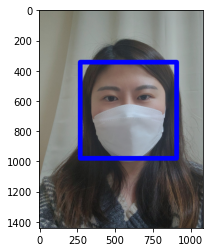

0 번째 사진
green
green
green
There are total  3 people!
There are  0 red people!
There are  0 yellow people!
There are  3 green people!


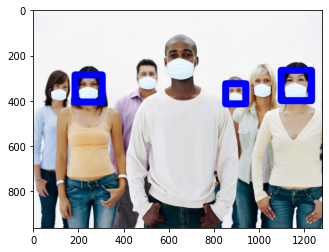

2 번째 사진
yellow
There are total  1 people!
There are  0 red people!
There are  1 yellow people!
There are  0 green people!


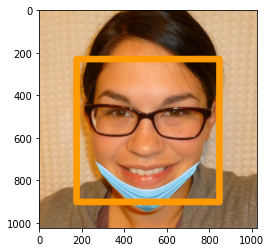

0 번째 사진
There are total  0 people!
There are  0 red people!
There are  0 yellow people!
There are  0 green people!


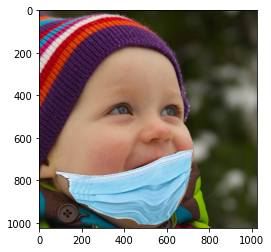

In [ ]:
face_cascade = cv2.CascadeClassifier(utils.get_haarcascade_path('haarcascade_frontalface_default.xml'))

uploaded = files.upload()
i = 1
for fn in uploaded.keys():
    print(i,"번째 사진")
    i+=1


    img = cv2.imread(fn)

    # load face cascade and eye cascade
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, 1.3, 3)

    rr=0
    gg=0
    yy=0
    rr_faces=[]
    gg_faces=[]
    yy_faces=[]

    for i, (x, y, w, h) in enumerate(faces):
        
        cropped = img[y - int(h/4):y + h + int(h/4), x - int(w/4):x + w + int(w/4)]
        face_img= cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)
        face_img=cv2.resize(face_img,(150,150))

        # plt.imshow(face_img)
        # plt.show()
        
        x = image.img_to_array(face_img)
        x = np.expand_dims(x, axis=0)
        images = np.vstack([x])
        classes = model.predict(images, batch_size=10)
        classes_1 = classes.tolist()
        classes_2 = classes_1[0]
        if classes_2.index(max(classes_2))==0:
          color="green"
        elif classes_2.index(max(classes_2))==1:
          color="red"
        elif classes_2.index(max(classes_2))==2:
          color="yellow"

        print(color)

        if color=="red":
          rr+=1
          rr_faces.append(faces[i])
        elif color=="green":
          gg+=1
          gg_faces.append(faces[i])
        elif color=="yellow":
          yy+=1
          yy_faces.append(faces[i])
        
    print("There are total ",len(faces), "people!")
    print("There are ",rr, "red people!")
    print("There are ",yy, "yellow people!")
    print("There are ",gg, "green people!")

    for (x, y, w, h) in gg_faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255,0,0), 30)

    for (x, y, w, h) in yy_faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0,155,255), 30)

    for (x, y, w, h) in rr_faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 30)


    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure()
    plt.imshow(img)
    plt.show()

    # (255,0,0) 파랑
    # (0,255,0) 초록
    # (0,0,255) 빨강
    # (0,155,255) 노랑
